In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
data = pd.read_csv(uri)
data.head()

unfinished  expected_hours  price
0           1              26    192
1           1              88   9015
2           1              89   2577
3           1              42    275
4           1              39    170

In [2]:
data['finished'] = data['unfinished'].map({1: 0, 0: 1})
data.head()

unfinished  expected_hours  price  finished
0           1              26    192         0
1           1              88   9015         0
2           1              89   2577         0
3           1              42    275         0
4           1              39    170         0

In [3]:
del data['unfinished']
data.head()

expected_hours  price  finished
0              26    192         0
1              88   9015         0
2              89   2577         0
3              42    275         0
4              39    170         0

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

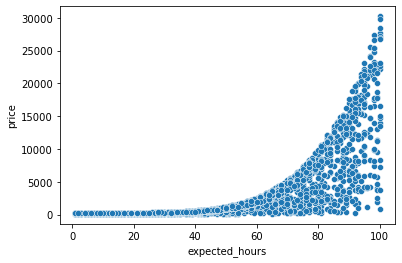

In [4]:
import seaborn as sns

sns.scatterplot(x='expected_hours', y='price', data=data)

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

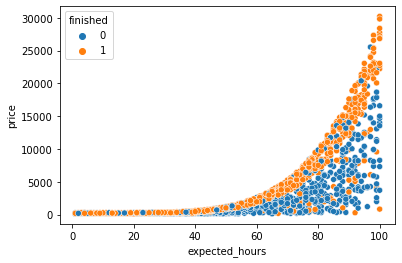

In [5]:
sns.scatterplot(x='expected_hours', y='price', hue='finished', data=data)

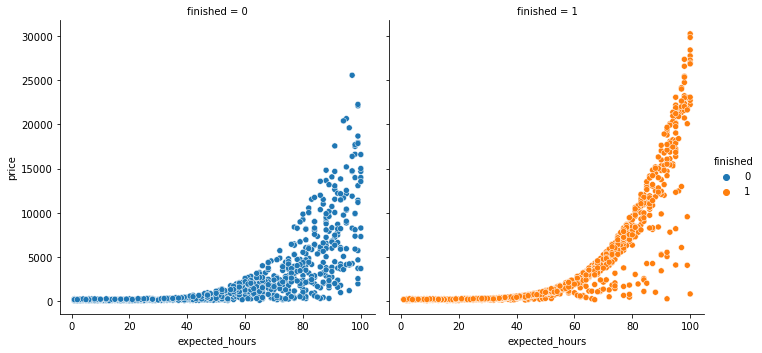

In [6]:
sns.relplot(x='expected_hours', y='price', hue='finished', col='finished', data=data)

In [7]:
X = data[['expected_hours', 'price']]
Y = data['finished']

In [8]:
data.shape

(2157, 3)

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 5
np.random.seed(SEED)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=SEED, test_size=0.25)

In [10]:
from sklearn.svm import LinearSVC

model = LinearSVC(random_state=SEED)
model.fit(X_train, Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=5)

In [11]:
predicted = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, predicted)
print('Precisão: %.2f%%' % (accuracy * 100))

Precisão: 54.07%


## Baseline

In [13]:
import numpy as np

baseline = np.ones(len(Y_test))
accuracy = accuracy_score(Y_test, baseline)
print('Precisão do Baseline: %.2f%%' % (accuracy * 100))

Precisão do Baseline: 52.59%


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

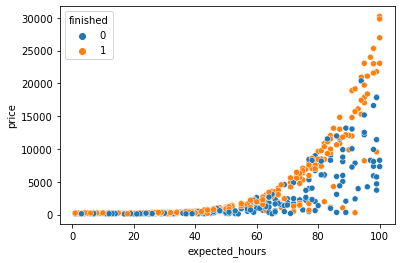

In [14]:
sns.scatterplot(x='expected_hours', y='price', hue=Y_test, data=X_test)

In [15]:
x_min = X_test['expected_hours'].min()
x_max = X_test['expected_hours'].max()

y_min = X_test['price'].min()
y_max = X_test['price'].max()

In [16]:
pixels = 100

x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [17]:
xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]

In [18]:
Z = model.predict(points)
Z = Z.reshape(xx.shape)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


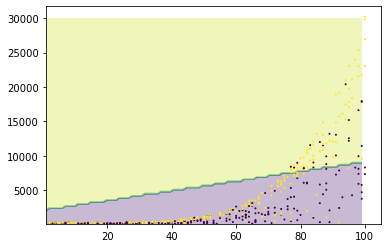

In [19]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test.expected_hours, X_test.price, c=Y_test, s=1)

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 5
np.random.seed(SEED)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=SEED, test_size=0.25)

In [21]:
from sklearn.svm import SVC

model = SVC(gamma='auto', random_state=SEED)
model.fit(X_train, Y_train)

SVC(gamma='auto', random_state=5)

In [22]:
predicted = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, predicted)
print('Precisão: %.2f%%' % (accuracy * 100))

Precisão: 59.07%


In [24]:
Z = model.predict(points)
Z = Z.reshape(xx.shape)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


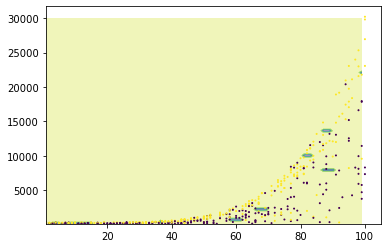

In [25]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test.expected_hours, X_test.price, c=Y_test, s=1)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC

raw_X_train, raw_X_test, raw_Y_train, raw_Y_test = train_test_split(X, Y, stratify=Y, random_state=SEED, test_size=0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(raw_X_train)
X_test = scaler.transform(raw_X_test)

model = SVC(gamma='auto', random_state=SEED)
model.fit(X_train, raw_Y_train)

predicted = model.predict(X_test)

accuracy = accuracy_score(raw_Y_test, predicted)
print('Precisão: %.2f%%' % (accuracy * 100))

Precisão: 66.85%


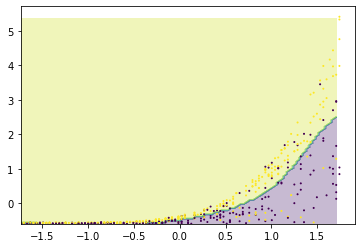

In [27]:
data_x = X_test[:,0]
data_y = X_test[:,1]

x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

pixels = 100

x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=raw_Y_test, s=1)